In [1]:
import os
import sys
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets
from scipy.optimize import Bounds
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data
from src import efficient_frontier
from src import plot
from src import portfolio
from src import capm
from src import backtesting
import numpy as np
import pandas as pd
import ipywidgets
from scipy.optimize import Bounds
import datetime
from dateutil import rrule
import yfinance as yf
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module='pandas')

In [2]:
weights = np.array([1/3,1/3,1/3])
min_esg_score = 0
max_esg_score = 2000
df = pd.read_excel('../data/ESG_DATA_S&P500.xlsx')

df = df[(df["stock_symbol"] == 'MMM') |(df['stock_symbol'] == 'AOS') | (df['stock_symbol']=='ABT')] #['MMM','AOS','ABT']


Bounds1 = Bounds(-1,2) #How willing we are to go short and to invest in one particular stock
Wanted_return = 0.20 #Only used when using the wanted_return constraint
maximum_risk = 0.10 #Either used when using maximum risk constraint or cmle portfolio
sharpe_type = "No_extra_constraint"  # rename to constraint, can be either Wanted_return or Maximum_risk or No_extra_constraint
risk_free_rate = 0.01
covariance_window = 5
rebalancing_freq = 'monthly'

strategy1 = {'df': df,
 'weights': weights,
 'min_esg_score': min_esg_score,
 'max_esg_score': max_esg_score,
 'bounds': Bounds1,
 'sharpe_type': sharpe_type,
 'wanted_return': Wanted_return,
 'maximum_risk': maximum_risk,
 'rebalancing_freq': rebalancing_freq,
 'risk_free_rate': risk_free_rate}


In [3]:
data5 = backtesting.backtesting(strategy1, 'monthly', 6, '2014-02-01','2014-07-01',0,10,'^GSPC',False)
data5[3]

Min. Risk = 4.737% => Return: 1.995%  Sharpe Ratio = 0.42
Max. Sharpe Ratio = 0.61 => Return: 4.18%  Risk: 6.868%
Excpected return on investment is 139.7671694874292%


[1.4116613054802845]

In [4]:
data5

([       ABT       AOS       MMM
  0 -0.85658  0.004643  1.851937],
 [   ESG_score_of_portfolio
  0              1087.92316],
 [[1.4560708786721352]],
 [1.4116613054802845],
 [1.397671694874292],
 [[0.05635750841677509]],
 [array([0.0698617])],
 [0.07739925662135205],
 [array([0.09716288])],
 ['2014/08/01'],
 [array([0.09716288])],
 [0.07739925662135194],
 [array([0.0698617])])

In [5]:
print(data5[9],data5[8],data5[7])

['2014/08/01'] [array([0.09716288])] [0.07739925662135205]


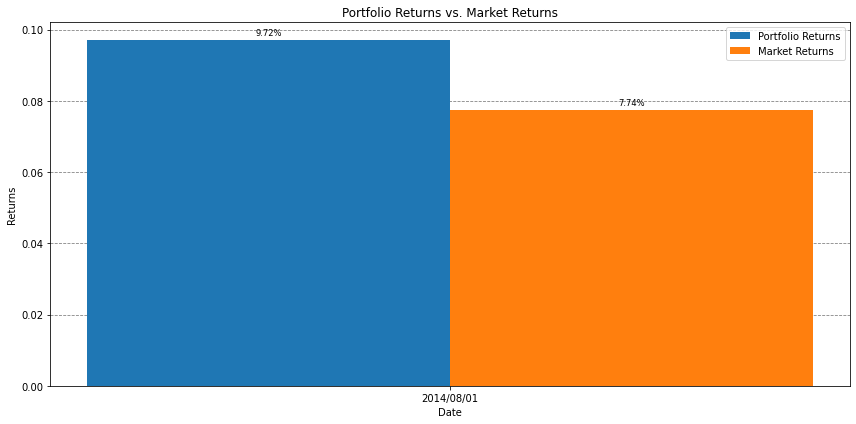

In [6]:



plot.compare_returns1(data5[9],np.concatenate(data5[8]),data5[7])


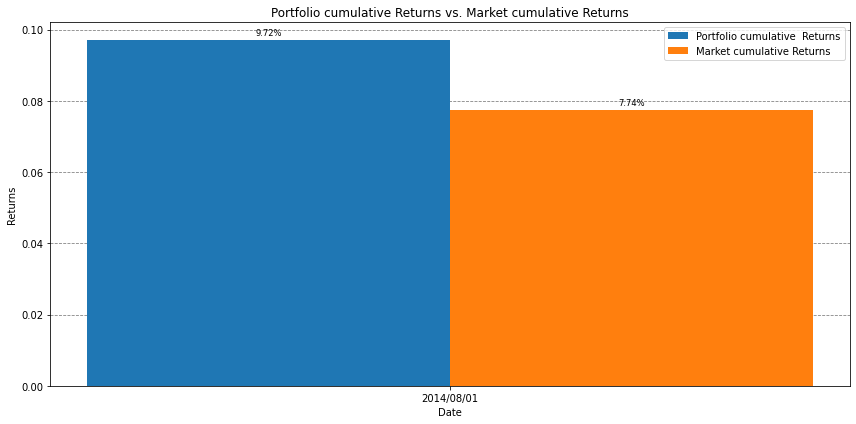

In [7]:

plot.compare_cumulative_returns(data5[9],np.concatenate(data5[10]),data5[11])